In [147]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

In [142]:
df = pd.read_csv(r'C:\Users\pelik\python\diplomopis\parser_data\geocoder_data.csv',index_col=0)

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'url', 'seller_url', 'title', 'squares',
       'full_price', 'price_per_square', 'floor', 'free', 'city', 'district',
       'okrug', 'street', 'house_number', 'description', 'sub_near',
       'highway_near', 'current_floor', 'max_floor', 'address', 'latitude',
       'longitude'],
      dtype='object')

In [143]:
df = df[['squares',
       'full_price', 'price_per_square', 'free', 'current_floor', 'max_floor', 'latitude',
       'longitude']]

In [9]:
df

,squares,full_price,price_per_square,free,current_floor,max_floor,latitude,longitude
0,131.63,41000000.0,311480.0,0,1.0,2.0,30.082621,59.724677
1,145.10,37000000.0,254997.0,0,1.0,5.0,30.316138,59.911854
2,73.50,26000000.0,353742.0,0,1.0,7.0,30.301127,59.912368
3,682.00,71500000.0,104839.0,0,1.0,2.0,30.506167,59.941687
4,33.90,6441000.0,190000.0,0,1.0,9.0,30.449978,59.956836
...,...,...,...,...,...,...,...,...
1206,1555.00,123000000.0,79100.0,0,3.0,3.0,30.302187,60.040204
1207,1555.00,132175000.0,85000.0,0,3.0,3.0,30.302187,60.040204
1208,45.00,3800000.0,84445.0,0,NaN,NaN,30.297156,59.956899
1209,274.40,43000000.0,156706.0,1,1.0,1.0,30.237427,60.033976


In [144]:
df.isna().sum()

squares              27
full_price            0
price_per_square      0
free                  0
current_floor       176
max_floor           176
latitude              0
longitude             0
dtype: int64

In [26]:
df[df['squares'].notna()]

,squares,full_price,price_per_square,free,current_floor,max_floor,latitude,longitude
0,131.63,41000000.0,311480.0,0,1.0,2.0,30.082621,59.724677
1,145.10,37000000.0,254997.0,0,1.0,5.0,30.316138,59.911854
2,73.50,26000000.0,353742.0,0,1.0,7.0,30.301127,59.912368
3,682.00,71500000.0,104839.0,0,1.0,2.0,30.506167,59.941687
4,33.90,6441000.0,190000.0,0,1.0,9.0,30.449978,59.956836
...,...,...,...,...,...,...,...,...
1206,1555.00,123000000.0,79100.0,0,3.0,3.0,30.302187,60.040204
1207,1555.00,132175000.0,85000.0,0,3.0,3.0,30.302187,60.040204
1208,45.00,3800000.0,84445.0,0,NaN,NaN,30.297156,59.956899
1209,274.40,43000000.0,156706.0,1,1.0,1.0,30.237427,60.033976


In [145]:
df = df[df['squares'].notna()]

In [28]:
len(df)

1184

In [146]:
df.isna().sum()

squares               0
full_price            0
price_per_square      0
free                  0
current_floor       149
max_floor           149
latitude              0
longitude             0
dtype: int64

In [32]:
df['max_floor'].mode()

0    5.0
Name: max_floor, dtype: float64

In [19]:
df.describe()

,squares,full_price,price_per_square,free,current_floor,max_floor,latitude,longitude
count,1184.000000,1.184000e+03,1.184000e+03,1184.000000,1035.000000,1035.000000,1184.000000,1184.000000
mean,857.822390,8.491718e+07,3.961422e+05,0.082770,1.292754,9.655072,30.288990,59.883443
std,11465.290558,6.821772e+08,2.030861e+06,0.275651,0.965706,7.574125,0.887773,1.743405
min,1.000000,1.590000e+04,4.100000e+01,0.000000,1.000000,1.000000,0.000000,0.000000
25%,70.000000,1.580188e+07,1.646372e+05,0.000000,1.000000,4.000000,30.276567,59.894524
50%,111.000000,2.824230e+07,2.354535e+05,0.000000,1.000000,7.000000,30.323315,59.936206
75%,202.325000,4.816250e+07,3.210635e+05,0.000000,1.000000,13.500000,30.368992,59.985804
max,275000.000000,2.222240e+10,4.300000e+07,1.000000,15.000000,28.000000,30.642972,60.121300


In [38]:
df.dtypes

squares             float64
full_price          float64
price_per_square    float64
free                  int64
current_floor       float64
max_floor           float64
latitude            float64
longitude           float64
dtype: object

In [148]:

# Инициализация KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Применение импутации
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [149]:
df.isna().sum()

squares             0
full_price          0
price_per_square    0
free                0
current_floor       0
max_floor           0
latitude            0
longitude           0
dtype: int64

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
lll = df[df['squares']<=1000]

<Axes: xlabel='squares', ylabel='Count'>

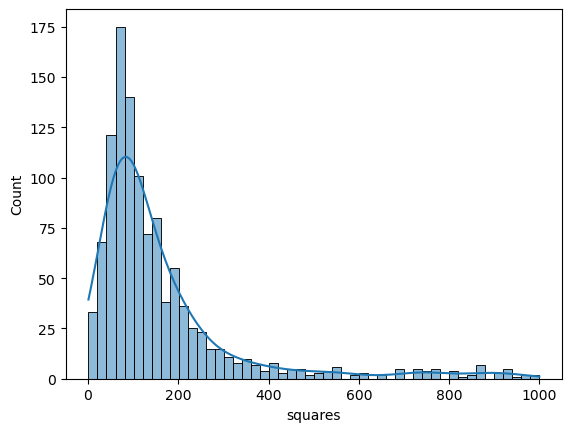

In [151]:
sns.histplot(lll['squares'], kde=True,bins = 50)


In [152]:
lll = lll[lll['squares'] >= 20.0]
lll = lll[lll['squares'] <= 300.0]

<Axes: xlabel='squares', ylabel='Count'>

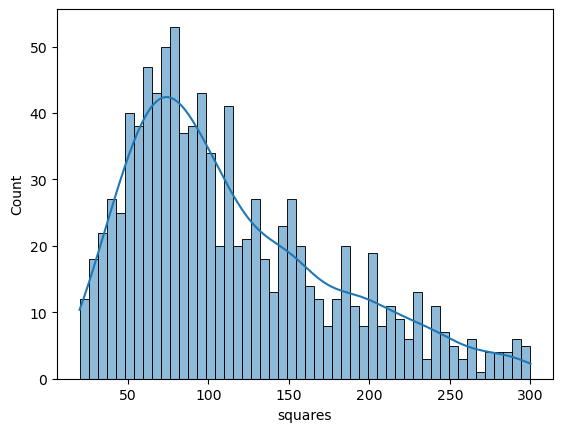

In [153]:
sns.histplot(lll['squares'], kde=True,bins = 50)

In [130]:
lll.columns

Index(['squares', 'full_price', 'price_per_square', 'free', 'current_floor',
       'max_floor', 'latitude', 'longitude'],
      dtype='object')

In [154]:
lll.describe()

,squares,full_price,price_per_square,free,current_floor,max_floor,latitude,longitude
count,967.000000,9.670000e+02,9.670000e+02,967.000000,967.000000,967.000000,967.000000,967.000000
mean,114.304105,4.309791e+07,3.969580e+05,0.077559,1.267494,10.211996,30.283709,59.872435
std,63.470631,2.083245e+08,1.776756e+06,0.267615,0.945202,7.349063,0.980139,1.928789
min,20.000000,1.590000e+04,1.700000e+02,0.000000,1.000000,1.000000,0.000000,0.000000
25%,66.825000,1.500000e+07,1.766685e+05,0.000000,1.000000,5.000000,30.276630,59.896973
50%,97.500000,2.477539e+07,2.500000e+05,0.000000,1.000000,8.000000,30.322812,59.936282
75%,151.350000,3.725759e+07,3.330430e+05,0.000000,1.000000,14.000000,30.366641,59.985804
max,300.000000,4.856780e+09,3.635042e+07,1.000000,15.000000,28.000000,30.642972,60.110679


<Axes: xlabel='price_per_square', ylabel='Count'>

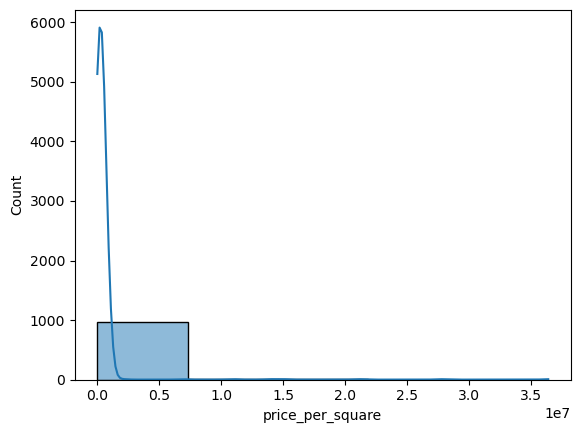

In [155]:
sns.histplot(lll['price_per_square'], kde=True,bins = 5)

In [133]:
lll[lll['price_per_square'] <= 1000000.0]

,squares,full_price,price_per_square,free,current_floor,max_floor,latitude,longitude
0,131.63,41000000.0,311480.0,0,1.0,2.0,30.082621,59.724677
1,145.10,37000000.0,254997.0,0,1.0,5.0,30.316138,59.911854
2,73.50,26000000.0,353742.0,0,1.0,7.0,30.301127,59.912368
4,33.90,6441000.0,190000.0,0,1.0,9.0,30.449978,59.956836
5,89.40,14900000.0,166667.0,0,1.0,5.0,30.325543,59.926372
...,...,...,...,...,...,...,...,...
1201,181.60,38599999.0,212556.0,0,1.0,16.0,30.273171,59.963539
1202,81.00,33900000.0,418519.0,0,1.0,20.0,30.308223,59.904247
1203,265.00,24354538.0,91904.0,0,1.0,21.0,29.953560,60.091011
1208,45.00,3800000.0,84445.0,0,1.0,5.0,30.297156,59.956899


<Axes: xlabel='price_per_square', ylabel='Count'>

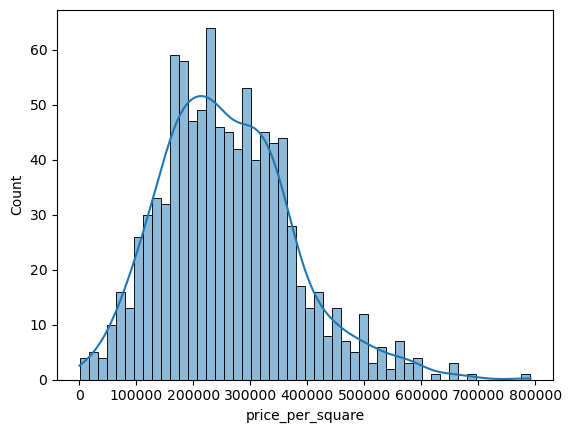

In [156]:
sns.histplot(lll[lll['price_per_square'] <= 1000000.0]['price_per_square'], kde=True,bins = 50)

In [157]:
lll = lll[lll['price_per_square'] <= 450000.0]

In [158]:
lll[lll['price_per_square'] <= 40000.0]

,squares,full_price,price_per_square,free,current_floor,max_floor,latitude,longitude
34,94.0,15900.0,170.0,1.0,1.000000,6.666667,30.337185,60.028357
127,85.0,100000.0,1177.0,0.0,1.000000,1.000000,30.312814,59.940082
176,80.0,120000.0,1500.0,0.0,1.000000,7.000000,30.282828,59.923247
194,189.0,4990000.0,26403.0,0.0,1.333333,10.666667,30.362958,59.938531
208,182.0,3200000.0,17583.0,0.0,1.000000,9.000000,29.772477,59.997437
320,224.0,3890000.0,17367.0,0.0,2.666667,6.333333,30.276073,59.947883
460,70.0,2500000.0,35715.0,1.0,1.000000,1.000000,30.321330,59.912797
567,296.0,3359600.0,11350.0,0.0,1.333333,5.333333,30.217682,60.027678
594,240.0,6500000.0,27084.0,0.0,1.000000,1.000000,30.285541,60.018920
831,74.0,1650000.0,22298.0,0.0,1.000000,5.000000,29.837632,59.883065


<Axes: xlabel='price_per_square', ylabel='Count'>

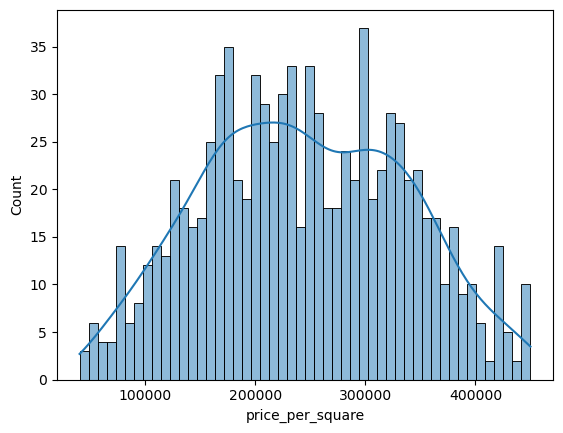

In [159]:
sns.histplot(lll[lll['price_per_square'] >= 40000.0]['price_per_square'], kde=True,bins = 50)

In [160]:
lll = lll[lll['price_per_square'] >= 40000.0]

In [94]:
lll

,squares,full_price,price_per_square,free,current_floor,max_floor,latitude,longitude
0,131.63,41000000.0,311480.0,0,1.0,2.0,30.082621,59.724677
1,145.10,37000000.0,254997.0,0,1.0,5.0,30.316138,59.911854
2,73.50,26000000.0,353742.0,0,1.0,7.0,30.301127,59.912368
4,33.90,6441000.0,190000.0,0,1.0,9.0,30.449978,59.956836
5,89.40,14900000.0,166667.0,0,1.0,5.0,30.325543,59.926372
...,...,...,...,...,...,...,...,...
1201,181.60,38599999.0,212556.0,0,1.0,16.0,30.273171,59.963539
1202,81.00,33900000.0,418519.0,0,1.0,20.0,30.308223,59.904247
1203,265.00,24354538.0,91904.0,0,1.0,21.0,29.953560,60.091011
1208,45.00,3800000.0,84445.0,0,5.0,5.0,30.297156,59.956899


<Axes: xlabel='current_floor', ylabel='Count'>

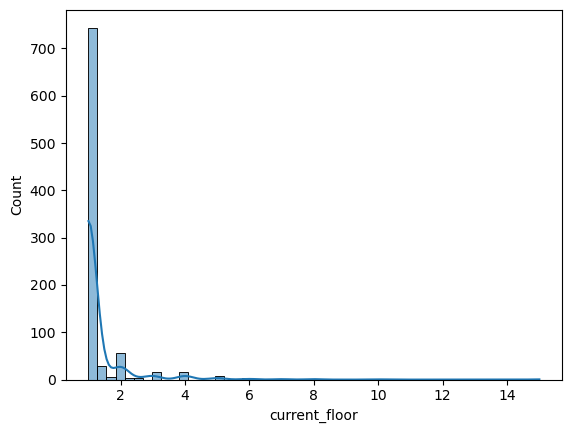

In [161]:
sns.histplot(lll['current_floor'], kde=True,bins = 50)

In [162]:
lll = lll.drop(columns='current_floor')

<Axes: xlabel='max_floor', ylabel='Count'>

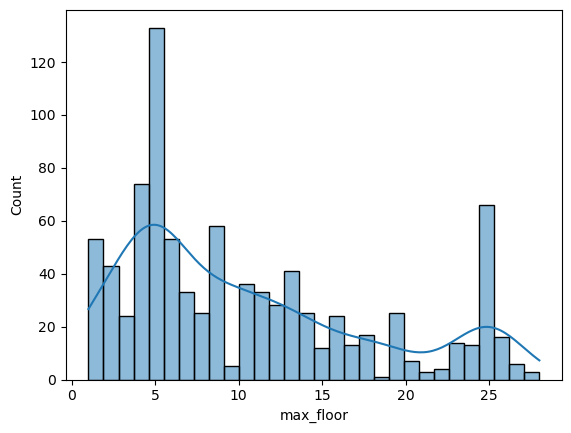

In [170]:
sns.histplot(lll['max_floor'], kde=True,bins = 30)

In [164]:
lll.corr()

,squares,full_price,price_per_square,free,max_floor,latitude,longitude
squares,1.000000,0.739423,-0.161673,-0.058297,-0.130993,-0.023893,-0.010517
full_price,0.739423,1.000000,0.457987,-0.032312,-0.067111,-0.009811,0.000120
price_per_square,-0.161673,0.457987,1.000000,0.019777,0.102951,0.011575,0.015896
free,-0.058297,-0.032312,0.019777,1.000000,-0.002817,0.017979,0.007017
max_floor,-0.130993,-0.067111,0.102951,-0.002817,1.000000,-0.063904,-0.060299
latitude,-0.023893,-0.009811,0.011575,0.017979,-0.063904,1.000000,0.994212
longitude,-0.010517,0.000120,0.015896,0.007017,-0.060299,0.994212,1.000000


In [165]:
lll.reset_index(drop='index',inplace=True)

In [166]:
lll = lll[lll['latitude']>=29.0]

<Axes: xlabel='latitude', ylabel='Count'>

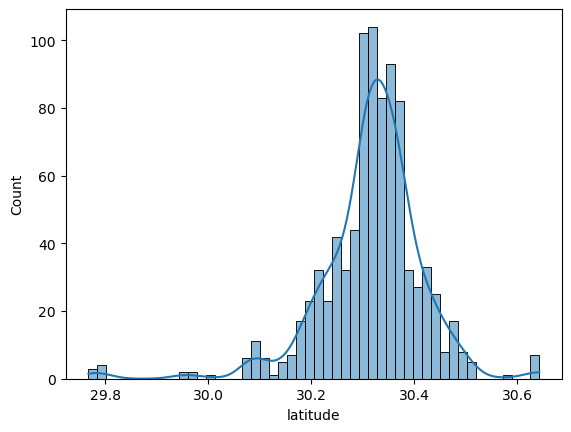

In [167]:
sns.histplot(lll['latitude'], kde=True,bins = 50)

<Axes: xlabel='longitude', ylabel='Count'>

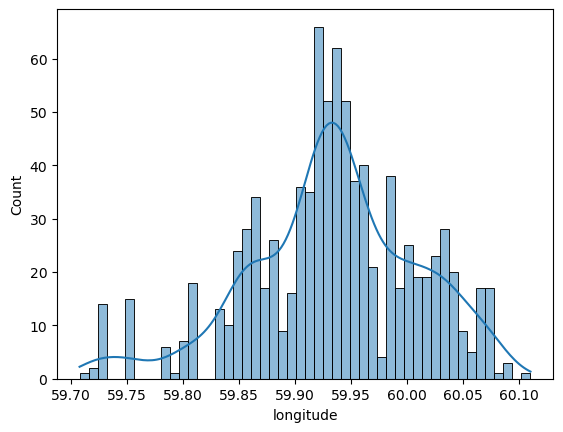

In [168]:
sns.histplot(lll['longitude'], kde=True,bins = 50)

<Axes: xlabel='latitude', ylabel='longitude'>

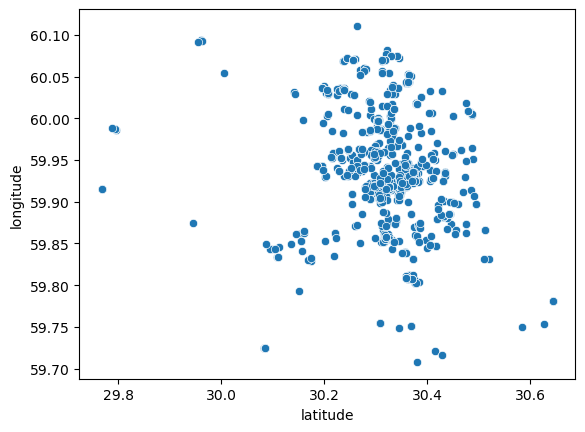

In [169]:
sns.scatterplot(data=lll,x='latitude',y='longitude')

In [118]:
lll.to_csv('obrabotano.csv')